## SELECTION DES ATTRIBUTS

#### EXO1

#### EXO2

In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv('airquality.csv')

In [7]:
dataset.shape

(153, 7)

In [8]:
dataset.columns

Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [9]:
dataset.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5


In [18]:
dataset = dataset.drop(dataset.columns[0], axis=1) 

Correlation matrix

In [19]:
df = pd.DataFrame(dataset)

correlation = df.corr()
print(correlation)

            Ozone   Solar.R      Wind      Temp     Month       Day
Ozone    1.000000  0.348342 -0.601547  0.698360  0.164519 -0.013226
Solar.R  0.348342  1.000000 -0.056792  0.275840 -0.075301 -0.150275
Wind    -0.601547 -0.056792  1.000000 -0.457988 -0.178293  0.027181
Temp     0.698360  0.275840 -0.457988  1.000000  0.420947 -0.130593
Month    0.164519 -0.075301 -0.178293  0.420947  1.000000 -0.007962
Day     -0.013226 -0.150275  0.027181 -0.130593 -0.007962  1.000000


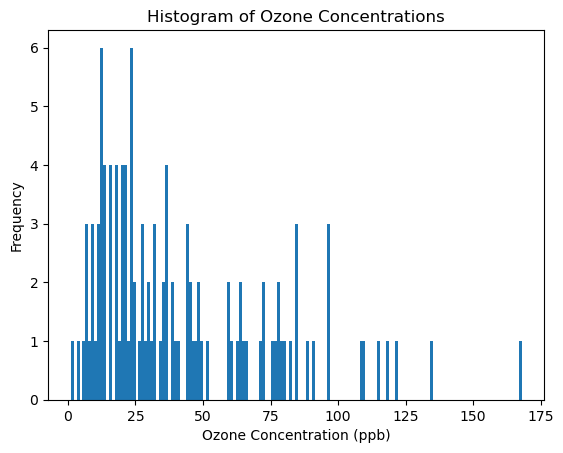

In [34]:
import matplotlib.pyplot as plt


plt.hist(dataset["Ozone"], bins=dataset.shape[0])

plt.xlabel("Ozone Concentration (ppb)")
plt.ylabel("Frequency")
plt.title("Histogram of Ozone Concentrations")

plt.show()